In [1]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot 

##########################
#http0.1://salib.readthedocs.io/en/latest/basics_with_interface.html
##########################


c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


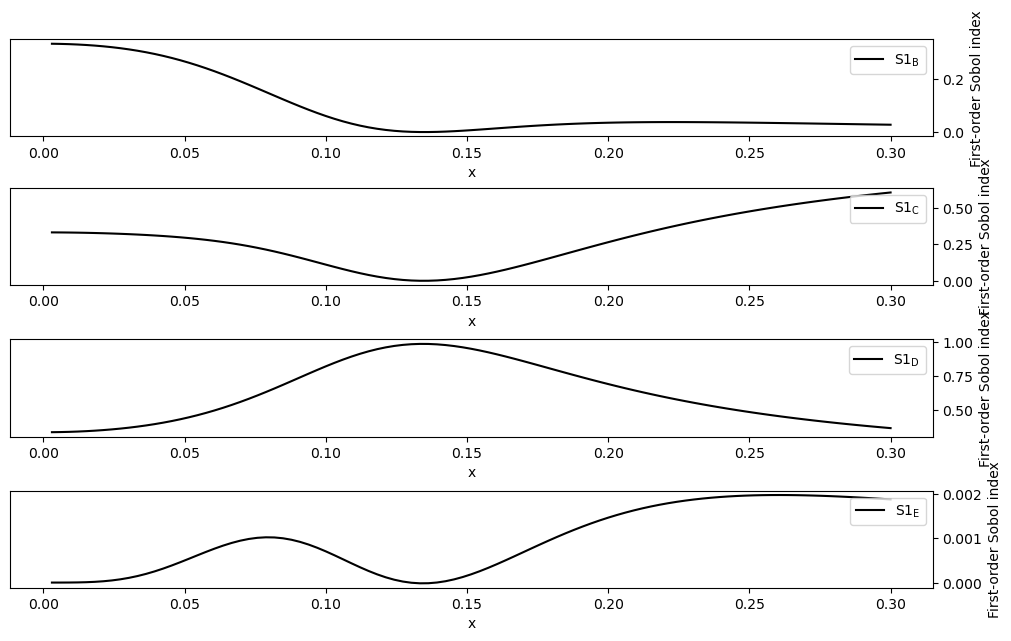

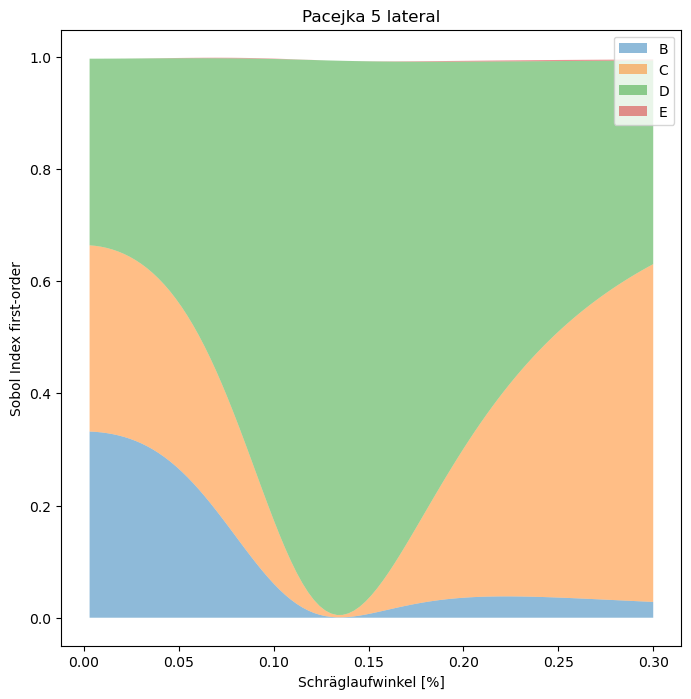

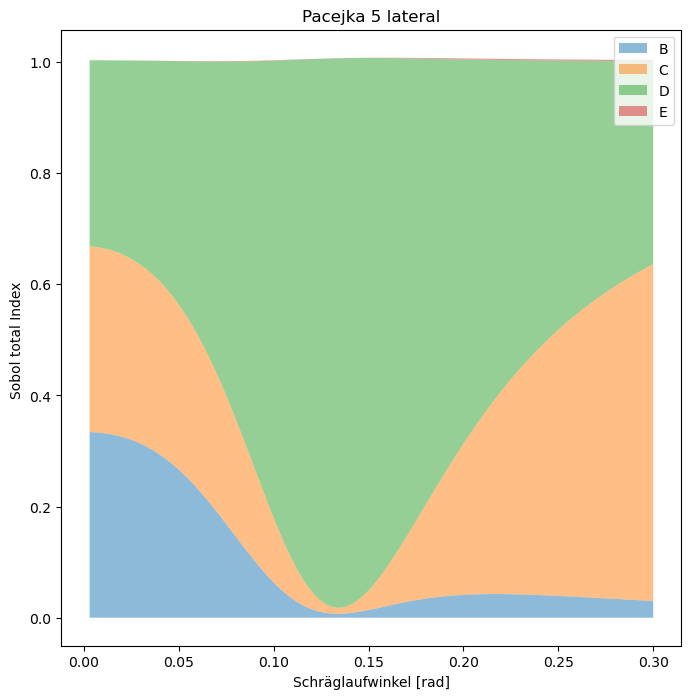

In [7]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec

#function
def Pacejka5_lat(alpha,B,C,D,E):

    Fy= 4000 *D * np.sin(C * np.arctan(B * alpha - E * (B*alpha - np.arctan(B * alpha)))) 
    
    return Fy
params_SA_Fy = [-9.06434405 , 1.60162373, -1.72069169, -0.80265574]
s=0.1
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[-9.06434405 *(1+s),-9.06434405*(1-s)], [1.60162373*(1-s), 1.60162373*(1+s)], [-1.72069169*(1+s), -1.72069169*(1-s)], [-0.80265574*(1+s), -0.80265574*(1-s)]],
})

alpha = np.linspace(0,0.3,100)

# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, alpha=alpha):
    y = np.zeros((ab.shape[0], alpha.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = Pacejka5_lat(alpha,B,C,D,E)

    return y

(
sp.sample_sobol(2**11) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(alpha, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten

S1s_B  = np.array(S1s[:,0])
S1s_C  = np.array(S1s[:,1])
S1s_D  = np.array(S1s[:,2])
S1s_E  = np.array(S1s[:,3])

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

plt.figure(2, figsize=(8,8))
plt.fill_between(alpha,S1s_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(alpha,S1s_B,S1s_C_plt, where = (S1s_C_plt > S1s_B), alpha=0.5, label = 'C')
plt.fill_between(alpha,S1s_C_plt,S1s_D_plt, where = (S1s_D_plt > S1s_C_plt), alpha=0.5, label = 'D')
plt.fill_between(alpha,S1s_D_plt,S1s_E_plt, where = (S1s_E_plt > S1s_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()

STs_B  = np.array(STs[:,0])
STs_C  = np.array(STs[:,1])
STs_D  = np.array(STs[:,2])
STs_E  = np.array(STs[:,3])

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

plt.figure(3, figsize=(8,8))
plt.fill_between(alpha,STs_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(alpha,STs_B,STs_C_plt, where = (STs_C_plt > STs_B), alpha=0.5, label = 'C')
plt.fill_between(alpha,STs_C_plt,STs_D_plt, where = (STs_D_plt > STs_C_plt), alpha=0.5, label = 'D')
plt.fill_between(alpha,STs_D_plt,STs_E_plt, where = (STs_E_plt > STs_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()




0.3341921190191146
0.33410973124475746
0.3348468977045495


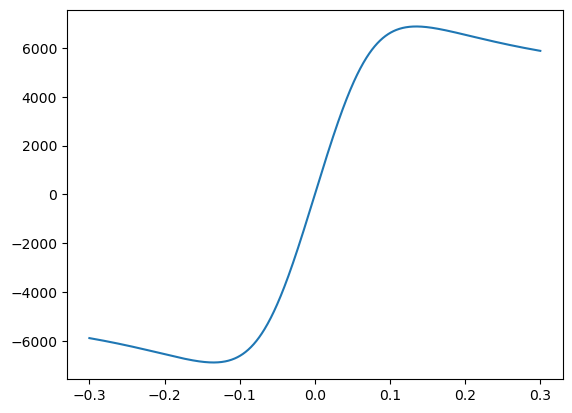

In [8]:
def Pacejka5_lat_pa(alpha,B,C,D,E):

    Fy= 4000 *D * np.sin(C * np.arctan(B * alpha - E * (B*alpha - np.arctan(B * alpha)))) 
    
    return Fy
params_SA_Fy = [-9.06434405 , 1.60162373, -1.72069169, -0.80265574]

Slip = np.linspace(-0.3,0.3,1000)
Fy_spax = Pacejka5_lat_pa(Slip,*params_SA_Fy)
plt.plot(Slip,Fy_spax)

print(STs_B[1])
print(STs_C[1])
print(STs_D[1])

c:\Users\bener\anaconda3\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in true_divide
  Y = (Y - Y.mean()) / Y.std()


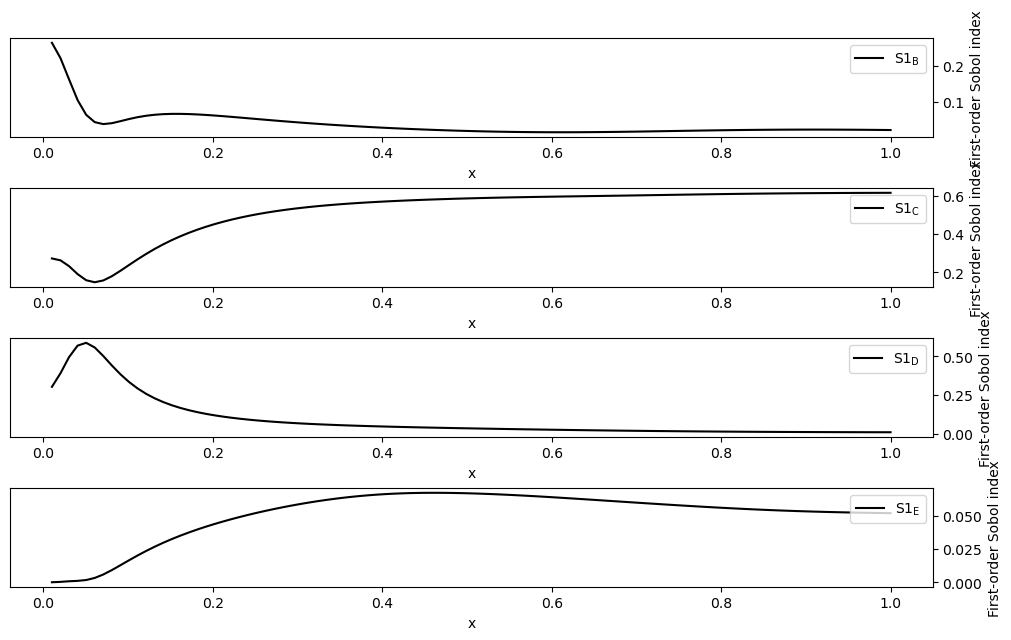

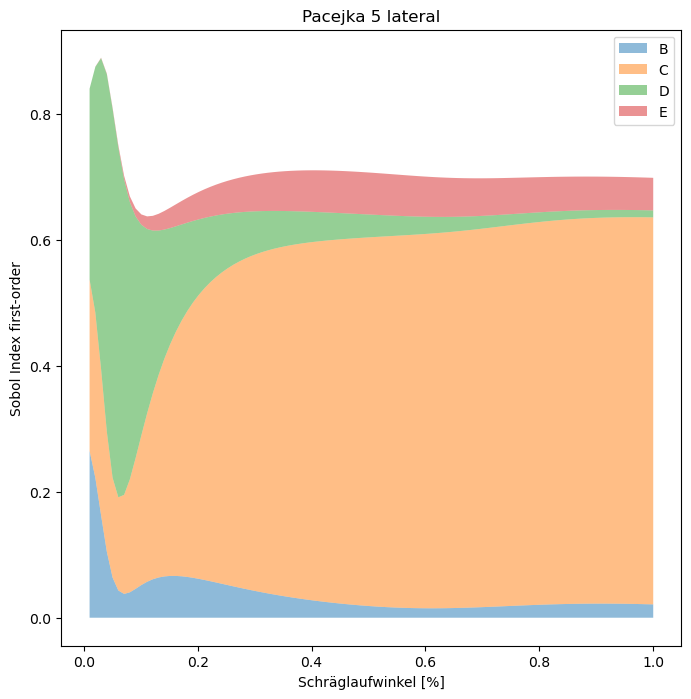

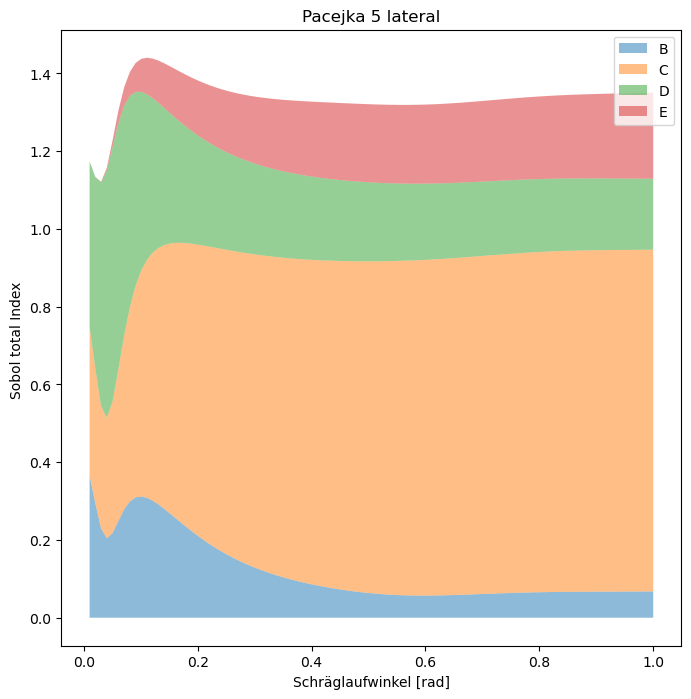

In [28]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec

#function
def Pacejka5_long_pa(SL,B,C,D,E):

    Fx= 4000 * D * np.sin(C * np.arctan(B * SL -E * (B*SL - np.arctan(B * SL)))) 
    
    return Fx
params_SA_Fy = [17.04378049 , 1.99996234 , 1.82504605 , 0.62177794]
s=0.8
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[17.04378049 *(1-s),17.04378049*(1+s)], [1.99996234*(1-s), 1.99996234*(1+s)], [1.82504605*(1-s), 1.82504605*(1+s)], [0.62177794*(1-s), 0.62177794*(1+s)]],
})

SL = np.linspace(0,1,100)

# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SL=SL):
    y = np.zeros((ab.shape[0], SL.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = Pacejka5_long_pa(SL,B,C,D,E)

    return y

(
sp.sample_sobol(2**11) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(SL, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten

S1s_B  = np.array(S1s[:,0])
S1s_C  = np.array(S1s[:,1])
S1s_D  = np.array(S1s[:,2])
S1s_E  = np.array(S1s[:,3])

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SL,S1s_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,S1s_B,S1s_C_plt, where = (S1s_C_plt > S1s_B), alpha=0.5, label = 'C')
plt.fill_between(SL,S1s_C_plt,S1s_D_plt, where = (S1s_D_plt > S1s_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,S1s_D_plt,S1s_E_plt, where = (S1s_E_plt > S1s_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()

STs_B  = np.array(STs[:,0])
STs_C  = np.array(STs[:,1])
STs_D  = np.array(STs[:,2])
STs_E  = np.array(STs[:,3])

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SL,STs_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,STs_B,STs_C_plt, where = (STs_C_plt > STs_B), alpha=0.5, label = 'C')
plt.fill_between(SL,STs_C_plt,STs_D_plt, where = (STs_D_plt > STs_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,STs_D_plt,STs_E_plt, where = (STs_E_plt > STs_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()




0.3118261098161859
0.3318248303105204
0.3592763872775898


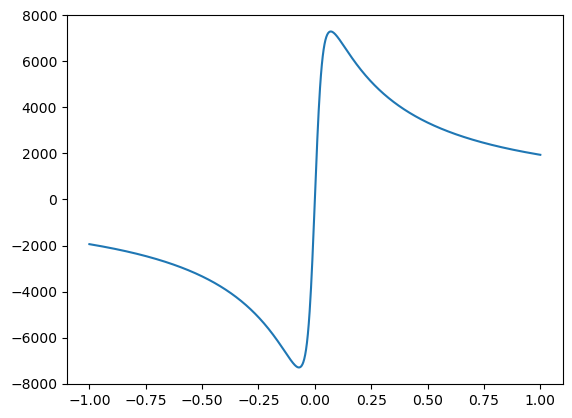

In [14]:
def Pacejka5_long_pa(SL,B,C,D,E):

    Fx= 4000 * D * np.sin(C * np.arctan(B * SL -E * (B*SL - np.arctan(B * SL)))) 
    
    return Fx
params_SA_Fy = [17.04378049 , 1.99996234 , 1.82504605 , 0.62177794]

Slip = np.linspace(-1,1,1000)
Fy_spax = Pacejka5_long_pa(Slip,*params_SA_Fy)
plt.plot(Slip,Fy_spax)

print(STs_B[1])
print(STs_C[1])
print(STs_D[1])

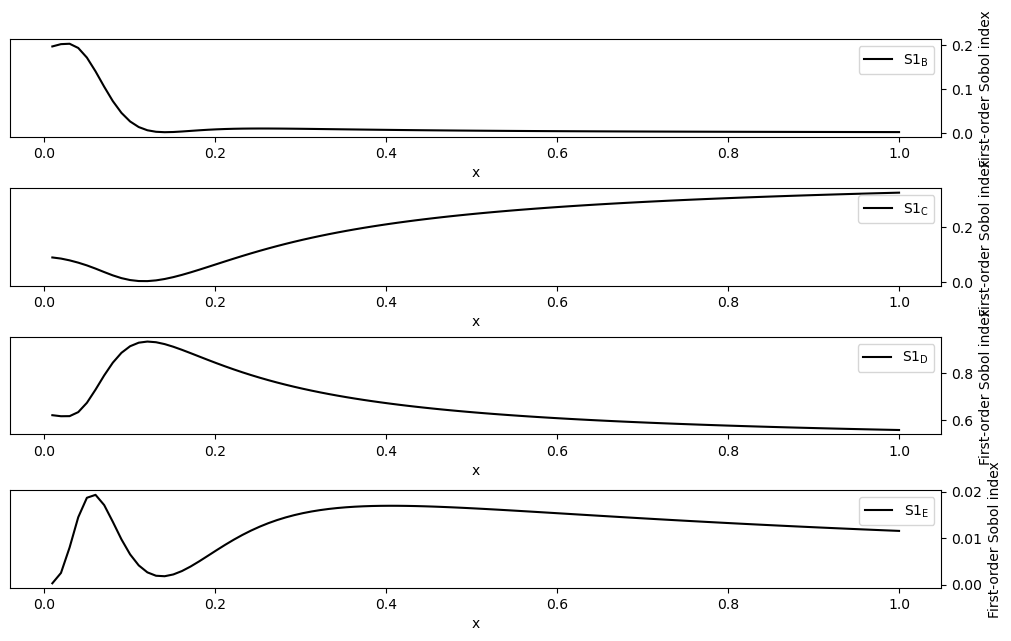

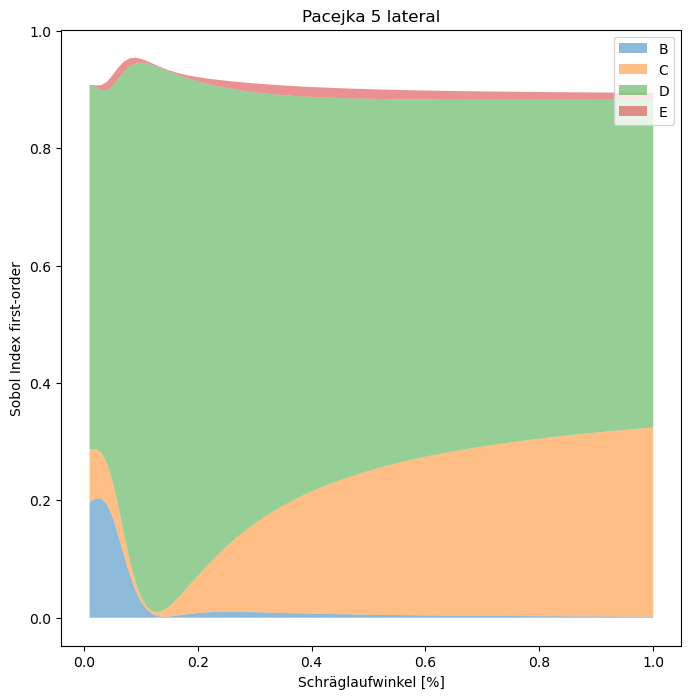

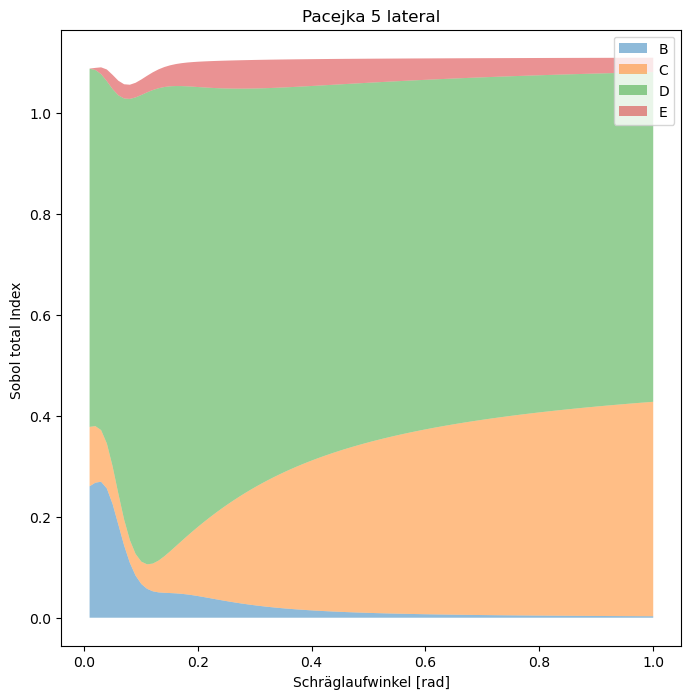

In [17]:
#same SA for Pacejka5 lateral

import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib import ProblemSpec

#function
def Pacejka5_long_pa(SL,B,C,D,E):

    Fx= 4000 * D * np.sin(C * np.arctan(B * SL -E * (B*SL - np.arctan(B * SL)))) 
    
    return Fx
params_SA_Fy = [17.04378049 , 1.99996234 , 1.82504605 , 0.62177794]
s=0.1
sp = ProblemSpec({
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[4,12], [1, 2], [0.1, 1.9], [-10, 1]],
})

SL = np.linspace(0,1,100)

# Create wrapper (runs each a, b combination separately)
def wrapped_function(ab, SL=SL):
    y = np.zeros((ab.shape[0], SL.shape[0]))
    for i, (B,C,D,E) in enumerate(ab):
        y[i,:] = Pacejka5_long_pa(SL,B,C,D,E)

    return y

(
sp.sample_sobol(2**11) #16000 iterationen
.evaluate(wrapped_function)
.analyze_sobol()
)

S1s = np.array([sp.analysis[_y]['S1'] for _y in sp['outputs']])

STs = np.array([sp.analysis[_y]['ST'] for _y in sp['outputs']])
y = sp.results

#Plot: Sensitivity Index für jeden Wert von SL
# Set up figure
fig = plt.figure(figsize=(10, 6), constrained_layout=True)
gs = fig.add_gridspec(4, 1)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
ax3 = fig.add_subplot(gs[3, 0])
# Populate figure subplots
for i, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.plot(SL, S1s[:, i],
            label=r'S1$_\mathregular{{{}}}$'.format(sp["names"][i]),
            color='black')
    ax.set_xlabel("x")
    ax.set_ylabel("First-order Sobol index")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
    ax.legend(loc='upper right')

#alle zusammen plotten

S1s_B  = np.array(S1s[:,0])
S1s_C  = np.array(S1s[:,1])
S1s_D  = np.array(S1s[:,2])
S1s_E  = np.array(S1s[:,3])

S1s_C_plt = np.array([x+y for x,y in zip(S1s_B,S1s_C)])
S1s_D_plt = np.array([x+y for x,y in zip(S1s_C_plt,S1s_D)])
S1s_E_plt = np.array([x+y for x,y in zip(S1s_D_plt,S1s_E)])

plt.figure(2, figsize=(8,8))
plt.fill_between(SL,S1s_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,S1s_B,S1s_C_plt, where = (S1s_C_plt > S1s_B), alpha=0.5, label = 'C')
plt.fill_between(SL,S1s_C_plt,S1s_D_plt, where = (S1s_D_plt > S1s_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,S1s_D_plt,S1s_E_plt, where = (S1s_E_plt > S1s_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [%]')
plt.ylabel('Sobol Index first-order')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()

STs_B  = np.array(STs[:,0])
STs_C  = np.array(STs[:,1])
STs_D  = np.array(STs[:,2])
STs_E  = np.array(STs[:,3])

STs_C_plt = np.array([x+y for x,y in zip(STs_B,STs_C)])
STs_D_plt = np.array([x+y for x,y in zip(STs_C_plt,STs_D)])
STs_E_plt = np.array([x+y for x,y in zip(STs_D_plt,STs_E)])

plt.figure(3, figsize=(8,8))
plt.fill_between(SL,STs_B,0, alpha=0.5, label = 'B') #alpha = deckkraft farbe
plt.fill_between(SL,STs_B,STs_C_plt, where = (STs_C_plt > STs_B), alpha=0.5, label = 'C')
plt.fill_between(SL,STs_C_plt,STs_D_plt, where = (STs_D_plt > STs_C_plt), alpha=0.5, label = 'D')
plt.fill_between(SL,STs_D_plt,STs_E_plt, where = (STs_E_plt > STs_D_plt), alpha=0.5, label = 'E')
plt.xlabel('Schräglaufwinkel [rad]')
plt.ylabel('Sobol total Index ')
plt.title('Pacejka 5 lateral')
plt.legend(loc='upper right')
plt.show()




In [26]:
print(sp['Samples'])

KeyError: 'Samples'